In [1]:
import numpy as np
import pandas as pd
#import warnings
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.set_option('display.max_columns',None)
%matplotlib inline 

/tmp/ipykernel_11539/458490773.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
data_frame = pd.read_csv("../dataset/KDDTest-21.txt")
data_frame.head()

,13,tcp,telnet,SF,118,2425,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,26,10,0.38,0.12,0.04,0.00.6,0.00.7,0.00.8,0.12.1,0.30,guess_passwd,2
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [11]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [12]:
#Assigning name for columns
data_frame.columns = columns

In [13]:
data_frame.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11849 non-null  int64  
 1   protocol_type                11849 non-null  object 
 2   service                      11849 non-null  object 
 3   flag                         11849 non-null  object 
 4   src_bytes                    11849 non-null  int64  
 5   dst_bytes                    11849 non-null  int64  
 6   land                         11849 non-null  int64  
 7   wrong_fragment               11849 non-null  int64  
 8   urgent                       11849 non-null  int64  
 9   hot                          11849 non-null  int64  
 10  num_failed_logins            11849 non-null  int64  
 11  logged_in                    11849 non-null  int64  
 12  num_compromised              11849 non-null  int64  
 13  root_shell      

In [15]:
data_frame.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
count,11849.000000,11849,11849,11849,1.184900e+04,1.184900e+04,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.0,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849,11849.000000
unique,NaN,3,62,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN
top,NaN,tcp,private,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,8631,1927,7277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2152,NaN
mean,415.473795,NaN,NaN,NaN,1.945807e+04,1.228004e+03,0.000591,0.016035,0.001350,0.190227,0.041185,0.253017,0.227699,0.004304,0.000506,0.218077,0.016204,0.002194,0.003882,0.0,0.000928,0.052916,94.123977,48.273441,0.113851,0.114600,0.274336,0.268378,0.752987,0.157162,0.096770,213.961263,117.550679,0.539610,0.148989,0.206507,0.024467,0.104190,0.106706,0.263964,0.252205,NaN,15.327960
std,1919.519063,NaN,NaN,NaN,6.520140e+05,2.389704e+04,0.024300,0.196387,0.050302,1.222442,0.205409,0.434759,10.026197,0.065468,0.029048,11.091406,0.933241,0.066213,0.076767,0.0,0.030456,0.223875,153.423049,119.218148,0.305956,0.309228,0.430364,0.430260,0.399054,0.338772,0.278675,82.189060,106.563355,0.423385,0.288770,0.379206,0.114238,0.265095,0.278559,0.377350,0.403056,NaN,4.405964
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,255.000000,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,14.000000
50%,0.000000,NaN,NaN,NaN,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,NaN,17.000000
75%,1.000000,NaN,NaN,NaN,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,132.000000,16.000000,0.000000,0.000000,0.840000,0.800000,1.000000,0.060000,0.000000,255.000000,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,NaN,18.000000


In [16]:


data_frame['outcome'] = np.where(data_frame['outcome'] == 'normal', 'normal', 'attack')


# Data Preprocessing

In [17]:
mapping = {"normal": 0, "attack": 1}

data_frame["outcome"] = data_frame["outcome"].map(mapping)

In [18]:
catecorigal_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
data_frame.drop(catecorigal_cols, axis=1, inplace=True)

In [19]:
data_frame.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,1,12
1,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,1,18
2,0,53,55,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,0,17
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,1,17
4,0,54540,8314,0,0,2,0,1,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,1,10


In [20]:
X = data_frame.drop(['outcome'], axis=1)
y = data_frame['outcome']


In [21]:
y = y.astype("int")

In [22]:
std_sclaer = StandardScaler()

x = std_sclaer.fit_transform(X)

In [23]:
dump(std_sclaer, 'std_scaler.bin', compress=True)


['std_scaler.bin']

# Feature Selection / Train-Test-Split


In [24]:
pca = PCA(n_components=10)

x = pca.fit_transform(x)

In [25]:
type(x)

numpy.ndarray

In [26]:
n_components = 10

# Get the indices of the original features with the highest loadings in the first 10 principal components
top_feature_indices = np.argsort(np.abs(pca.components_[:n_components]), axis=1)[:, ::-1]

# Map the indices to the original feature names
original_feature_names = X.columns  # Replace with your actual feature names
selected_feature_names = [original_feature_names[i] for i in top_feature_indices.ravel()]

# Print the names of the top 10 selected features
print("Top 10 selected feature names:")
for feature_name in selected_feature_names[:n_components]:
    print(feature_name)

Top 10 selected feature names:
dst_host_srv_rerror_rate
dst_host_rerror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
dst_host_same_srv_rate
diff_srv_rate
dst_host_srv_count
dst_host_diff_srv_rate
srv_count


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(9479, 10)

In [29]:
x_test.shape

(2370, 10)

# Training the Model


In [30]:
evals_metrics = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Calculate metrics on training and testing sets
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))

    # Store metrics in a dictionary
    evals_metrics[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]

    #Print and display metrics
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1 Score " + str(name) + " {}  Test F1 Score ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))

    #Display confusion matrix
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 97.55274261603375
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 98.49818746763334
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 98.49818746763334
Training F1 Score DecisionTreeClassifier 100.0  Test F1 Score DecisionTreeClassifier 98.49818746763334


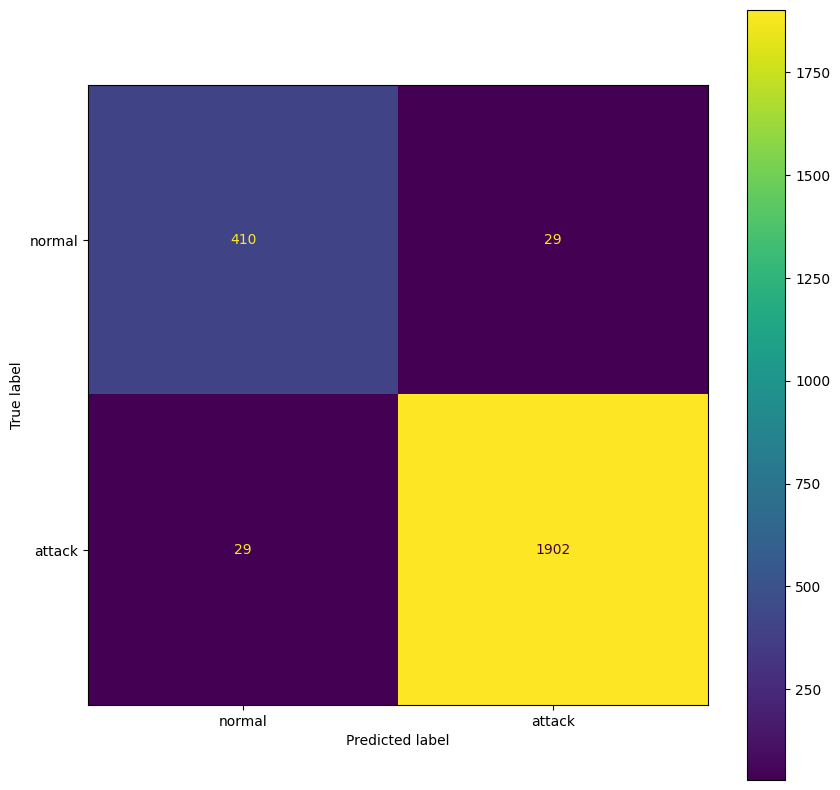

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

# Saving the model

In [32]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# New prediction

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
selected_features = ['dst_host_srv_rerror_rate',
'dst_host_rerror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'dst_host_same_srv_rate',
'diff_srv_rate',
'dst_host_srv_count',
'dst_host_diff_srv_rate',
'srv_count']

In [35]:
def predict_with_model(features, loaded_model):
    # Ensure the input features are in the correct order and format
    input_features = np.array(features).reshape(1, -1)

    # Initialize a StandardScaler for scaling the features
    scaler = StandardScaler()
    
    z = np.load('scaled-input.npy')
    
    scaler.fit_transform(z)

    # Scale the input features
    scaled_features = scaler.transform(input_features)

    # Make predictions using the loaded decision tree model
    prediction = loaded_model.predict(scaled_features)

    # Return the prediction
    return prediction

In [ ]:
input_features = [0.5, 0.3, 0.2, 0.4, 0.7, 0.8, 0.1, 100, 0.6, 50]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

In [ ]:
input_features = [0.244, 0.6, 0.67, 0.434, 0.91, 0.4, 0.56, 250, 0.46, 100]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)